In [1]:
using HTTP, CSV, DataFrames, StringEncodings, Plots

In [2]:
CONTENT_URL = "https://www.mhlw.go.jp/content/"

"https://www.mhlw.go.jp/content/"

In [3]:
OPEN_DATA_URL = "https://covid19.mhlw.go.jp/public/opendata/"

"https://covid19.mhlw.go.jp/public/opendata/"

In [4]:
POS_CSV = "newly_confirmed_cases_daily.csv"

"newly_confirmed_cases_daily.csv"

In [5]:
TST_CSV = "pcr_tested_daily.csv" 

"pcr_tested_daily.csv"

In [6]:
SVR_CSV = "severe_cases_daily.csv"

"severe_cases_daily.csv"

In [7]:
DTH_CSV = "deaths_cumulative_daily.csv"

"deaths_cumulative_daily.csv"

In [8]:
DL_DIR = "./"

"./"

In [9]:
HTTP.download(string(OPEN_DATA_URL, POS_CSV), DL_DIR)

┌ Info: Downloading
│   source = https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv
│   dest = ./newly_confirmed_cases_daily.csv
│   progress = 1.0
│   time_taken = 0.27 s
│   time_remaining = 0.0 s
│   average_speed = 2.199 MiB/s
│   downloaded = 598.979 KiB
│   remaining = 0 bytes
│   total = 598.979 KiB
└ @ HTTP C:\Users\ume77\.julia\packages\HTTP\IAI92\src\download.jl:119


"./newly_confirmed_cases_daily.csv"

In [10]:
HTTP.download(string(CONTENT_URL, TST_CSV), DL_DIR)

┌ Info: Downloading
│   source = https://www.mhlw.go.jp/content/pcr_tested_daily.csv
│   dest = ./pcr_tested_daily.csv
│   progress = 1.0
│   time_taken = 0.0 s
│   time_remaining = 0.0 s
│   average_speed = 4.757 MiB/s
│   downloaded = 9.743 KiB
│   remaining = 0 bytes
│   total = 9.743 KiB
└ @ HTTP C:\Users\ume77\.julia\packages\HTTP\IAI92\src\download.jl:119


"./pcr_tested_daily.csv"

In [11]:
HTTP.download(string(OPEN_DATA_URL, SVR_CSV), DL_DIR)

┌ Info: Downloading
│   source = https://covid19.mhlw.go.jp/public/opendata/severe_cases_daily.csv
│   dest = ./severe_cases_daily.csv
│   progress = 1.0
│   time_taken = 0.21 s
│   time_remaining = 0.0 s
│   average_speed = 2.299 MiB/s
│   downloaded = 491.926 KiB
│   remaining = 0 bytes
│   total = 491.926 KiB
└ @ HTTP C:\Users\ume77\.julia\packages\HTTP\IAI92\src\download.jl:119


"./severe_cases_daily.csv"

In [12]:
HTTP.download(string(OPEN_DATA_URL, DTH_CSV), DL_DIR)

┌ Info: Downloading
│   source = https://covid19.mhlw.go.jp/public/opendata/deaths_cumulative_daily.csv
│   dest = ./deaths_cumulative_daily.csv
│   progress = 1.0
│   time_taken = 0.17 s
│   time_remaining = 0.0 s
│   average_speed = 2.973 MiB/s
│   downloaded = 508.492 KiB
│   remaining = 0 bytes
│   total = 508.492 KiB
└ @ HTTP C:\Users\ume77\.julia\packages\HTTP\IAI92\src\download.jl:119


"./deaths_cumulative_daily.csv"

In [13]:
ENCODING = enc"UTF-8"

UTF-8 string encoding

In [14]:
RATE_LIMIT = 100.0

100.0

In [15]:
pos_sum = 0

0

In [16]:
dth_sum = 0

0

In [17]:
function read_csv(file_path)
    df = CSV.File(open(read, file_path, ENCODING)) |> DataFrame
    return df
end

read_csv (generic function with 1 method)

In [18]:
df_pos = read_csv(string(DL_DIR, POS_CSV))

,Date,Prefecture,Newly confirmed cases
,String,String,Int64
1,2020/1/26,ALL,1
2,2020/1/26,Hokkaido,0
3,2020/1/26,Aomori,0
4,2020/1/26,Iwate,0
5,2020/1/26,Miyagi,0
6,2020/1/26,Akita,0
7,2020/1/26,Yamagata,0
8,2020/1/26,Fukushima,0
9,2020/1/26,Ibaraki,0


In [19]:
df_tst = read_csv(string(DL_DIR, TST_CSV))

,日付,PCR 検査実施件数(単日)
,String,Int64?
1,2020/2/5,4
2,2020/2/6,19
3,2020/2/7,9
4,2020/2/8,4
5,2020/2/9,10
6,2020/2/10,12
7,2020/2/11,4
8,2020/2/12,10
9,2020/2/13,16


In [20]:
df_svr = read_csv(string(DL_DIR, SVR_CSV))

,Date,Prefecture,Severe cases
,String,String,Int64
1,2020/5/9,ALL,267
2,2020/5/9,Hokkaido,23
3,2020/5/9,Aomori,0
4,2020/5/9,Iwate,0
5,2020/5/9,Miyagi,0
6,2020/5/9,Akita,0
7,2020/5/9,Yamagata,0
8,2020/5/9,Fukushima,0
9,2020/5/9,Ibaraki,3


In [21]:
df_dth = read_csv(string(DL_DIR, DTH_CSV))

,Date,Prefecture,Deaths(Cumulative)
,String,String,Int64
1,2020/5/9,ALL,613
2,2020/5/9,Hokkaido,48
3,2020/5/9,Aomori,0
4,2020/5/9,Iwate,0
5,2020/5/9,Miyagi,1
6,2020/5/9,Akita,0
7,2020/5/9,Yamagata,0
8,2020/5/9,Fukushima,0
9,2020/5/9,Ibaraki,9


In [22]:
function get_pos_sum(x)
    global pos_sum += x
    return pos_sum
end

get_pos_sum (generic function with 1 method)

In [23]:
function get_dth_day(x)
    global dth_sum
    y = dth_sum
    dth_sum = x
    return x - y
end

get_dth_day (generic function with 1 method)

In [24]:
df_pos = df_pos[df_pos.Prefecture.=="ALL", [:"Date",:"Newly confirmed cases"]]

,Date,Newly confirmed cases
,String,Int64
1,2020/1/26,1
2,2020/1/27,0
3,2020/1/28,3
4,2020/1/29,1
5,2020/1/30,3
6,2020/1/31,0
7,2020/2/1,0
8,2020/2/2,0
9,2020/2/3,0


In [25]:
df_svr = df_svr[df_svr.Prefecture.=="ALL", [:"Date",:"Severe cases"]]

,Date,Severe cases
,String,Int64
1,2020/5/9,267
2,2020/5/10,249
3,2020/5/11,243
4,2020/5/12,259
5,2020/5/13,245
6,2020/5/14,237
7,2020/5/15,232
8,2020/5/16,230
9,2020/5/17,228


In [26]:
df_dth = df_dth[df_dth.Prefecture.=="ALL", [:"Date",:"Deaths(Cumulative)"]]

,Date,Deaths(Cumulative)
,String,Int64
1,2020/5/9,613
2,2020/5/10,621
3,2020/5/11,643
4,2020/5/12,668
5,2020/5/13,687
6,2020/5/14,710
7,2020/5/15,725
8,2020/5/16,744
9,2020/5/17,749


In [27]:
rename!(df_pos, [:"日付",:"PCR 検査陽性者数(単日)"])

,日付,PCR 検査陽性者数(単日)
,String,Int64
1,2020/1/26,1
2,2020/1/27,0
3,2020/1/28,3
4,2020/1/29,1
5,2020/1/30,3
6,2020/1/31,0
7,2020/2/1,0
8,2020/2/2,0
9,2020/2/3,0


In [28]:
rename!(df_svr, [:"日付",:"重症者数"])

,日付,重症者数
,String,Int64
1,2020/5/9,267
2,2020/5/10,249
3,2020/5/11,243
4,2020/5/12,259
5,2020/5/13,245
6,2020/5/14,237
7,2020/5/15,232
8,2020/5/16,230
9,2020/5/17,228


In [29]:
rename!(df_dth, [:"日付",:"死亡者数"])

,日付,死亡者数
,String,Int64
1,2020/5/9,613
2,2020/5/10,621
3,2020/5/11,643
4,2020/5/12,668
5,2020/5/13,687
6,2020/5/14,710
7,2020/5/15,725
8,2020/5/16,744
9,2020/5/17,749


In [30]:
df_pos[:, "累積感染者数"] = map(x -> get_pos_sum(x), df_pos[:, :"PCR 検査陽性者数(単日)"])

614-element Array{Int64,1}:
       1
       1
       4
       5
       8
       8
       8
       8
       8
       9
      11
      11
      11
       ⋮
 1671156
 1673375
 1675133
 1678362
 1681960
 1684045
 1686706
 1688835
 1689963
 1691682
 1693654
 1695222

In [31]:
df_tmp = innerjoin(df_pos, df_tst, on = :日付)

,日付,PCR 検査陽性者数(単日),累積感染者数,PCR 検査実施件数(単日)
,String,Int64,Int64,Int64?
1,2020/2/5,2,11,4
2,2020/2/6,0,11,19
3,2020/2/7,0,11,9
4,2020/2/8,0,11,4
5,2020/2/9,0,11,10
6,2020/2/10,0,11,12
7,2020/2/11,1,12,4
8,2020/2/12,1,13,10
9,2020/2/13,3,16,16


In [32]:
df_tmp2 = innerjoin(df_tmp, df_svr, on = :日付)

,日付,PCR 検査陽性者数(単日),累積感染者数,PCR 検査実施件数(単日),重症者数
,String,Int64,Int64,Int64?,Int64
1,2020/5/9,108,15692,2265,267
2,2020/5/10,66,15758,3995,249
3,2020/5/11,58,15816,5993,243
4,2020/5/12,87,15903,288,259
5,2020/5/13,55,15958,10074,245
6,2020/5/14,99,16057,5866,237
7,2020/5/15,55,16112,3092,232
8,2020/5/16,56,16168,4337,230
9,2020/5/17,29,16197,4987,228


In [33]:
df_dth[:, "死亡者数(単日)"] = map(x -> get_dth_day(x), df_dth[:, "死亡者数"])

510-element Array{Int64,1}:
 613
   8
  22
  25
  19
  23
  15
  19
   5
  14
   8
   6
  19
   ⋮
  48
  29
  43
  43
  56
  46
  32
  29
  29
  40
  54
  43

In [34]:
df_dth[:, "死亡者数(単日)(※10倍)"] = map(x -> (10 * x), df_dth[:, "死亡者数(単日)"])

510-element Array{Int64,1}:
 6130
   80
  220
  250
  190
  230
  150
  190
   50
  140
   80
   60
  190
    ⋮
  480
  290
  430
  430
  560
  460
  320
  290
  290
  400
  540
  430

In [35]:
df = innerjoin(df_tmp2, df_dth, on = :日付)

,日付,PCR 検査陽性者数(単日),累積感染者数,PCR 検査実施件数(単日),重症者数
,String,Int64,Int64,Int64?,Int64
1,2020/5/9,108,15692,2265,267
2,2020/5/10,66,15758,3995,249
3,2020/5/11,58,15816,5993,243
4,2020/5/12,87,15903,288,259
5,2020/5/13,55,15958,10074,245
6,2020/5/14,99,16057,5866,237
7,2020/5/15,55,16112,3092,232
8,2020/5/16,56,16168,4337,230
9,2020/5/17,29,16197,4987,228


In [36]:
df[:, "陽性率"] = df[:, "PCR 検査陽性者数(単日)"] ./ df[:, "PCR 検査実施件数(単日)"]

509-element Array{Float64,1}:
 0.04768211920529802
 0.016520650813516898
 0.00967795761722009
 0.3020833333333333
 0.005459598967639468
 0.016876917831571768
 0.01778783958602846
 0.012912151256629006
 0.005815119310206537
 0.005016722408026756
 0.009934802856255821
 0.010084491687108205
 0.009825327510917031
 ⋮
 0.07915380333012804
 0.0864175533268849
 0.08822710826607293
 0.020254156249639964
 0.03447024286095543
 0.07515718672320515
 0.01534679336665219
 0.04824235392229736
 0.07884601140656247
 0.01422625804010594
 0.02190562359027946
 0.02321474819296965

In [37]:
function get_rate_limited(rate)
    global RATE_LIMIT
    if rate > RATE_LIMIT
        rate = RATE_LIMIT
    end
    return rate
end

get_rate_limited (generic function with 1 method)

In [38]:
df[:, "陽性率"] = map(x -> get_rate_limited(x), df[:, "陽性率"])

509-element Array{Float64,1}:
 0.04768211920529802
 0.016520650813516898
 0.00967795761722009
 0.3020833333333333
 0.005459598967639468
 0.016876917831571768
 0.01778783958602846
 0.012912151256629006
 0.005815119310206537
 0.005016722408026756
 0.009934802856255821
 0.010084491687108205
 0.009825327510917031
 ⋮
 0.07915380333012804
 0.0864175533268849
 0.08822710826607293
 0.020254156249639964
 0.03447024286095543
 0.07515718672320515
 0.01534679336665219
 0.04824235392229736
 0.07884601140656247
 0.01422625804010594
 0.02190562359027946
 0.02321474819296965

In [39]:
df[:, "致死率"] = df[:, "死亡者数"] ./ df[:, "累積感染者数"]

509-element Array{Float64,1}:
 0.03906449146061688
 0.03940855438507425
 0.04065503287809813
 0.042004653210086146
 0.04305050758240381
 0.044217475244441674
 0.04499751737835154
 0.04601682335477486
 0.04624313144409459
 0.04702039810192889
 0.04741989052217233
 0.04768041237113402
 0.04871182914142341
 ⋮
 0.01028264841305199
 0.01029048155887302
 0.010294165981922761
 0.010309032178340467
 0.01031481885314372
 0.01032604818188304
 0.010340578785008714
 0.01034323705494615
 0.010347369636465374
 0.01035762321423605
 0.010370743437596428
 0.01039055202538417

In [40]:
println(df)

509×10 DataFrame
 Row │ 日付        PCR 検査陽性者数(単日)  累積感染者数  PCR 検査実施件数(単日)  重症者数  死亡者数  死亡者数(単日)  死亡者数(単日)(※10倍)  陽性率      致死率    
     │ String      Int64                   Int64         Union{Missing, Int64}   Int64     Int64     Int64           Int64                  Float64     Float64   
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ 2020/5/9                       108         15692                    2265       267       613             613                   6130  0.0476821   0.0390645
   2 │ 2020/5/10                       66         15758                    3995       249       621               8                     80  0.0165207   0.0394086
   3 │ 2020/5/11                       58         15816                    5993       243       643              22                    220  0.00967796  0.040655
   4 │ 2020/5/12                       87         15903     

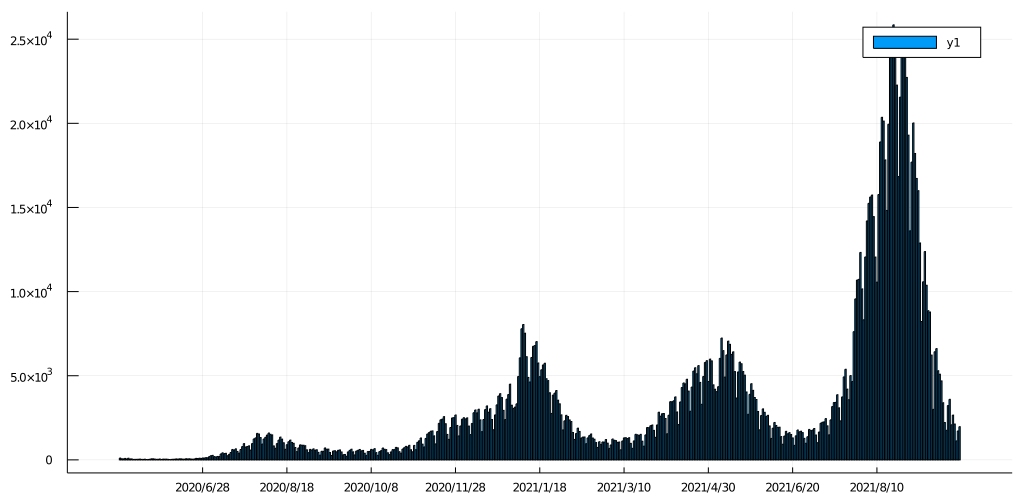

In [41]:
plot(df[:, "日付"], df[:, "PCR 検査陽性者数(単日)"], st=:bar, size=(1024, 500))

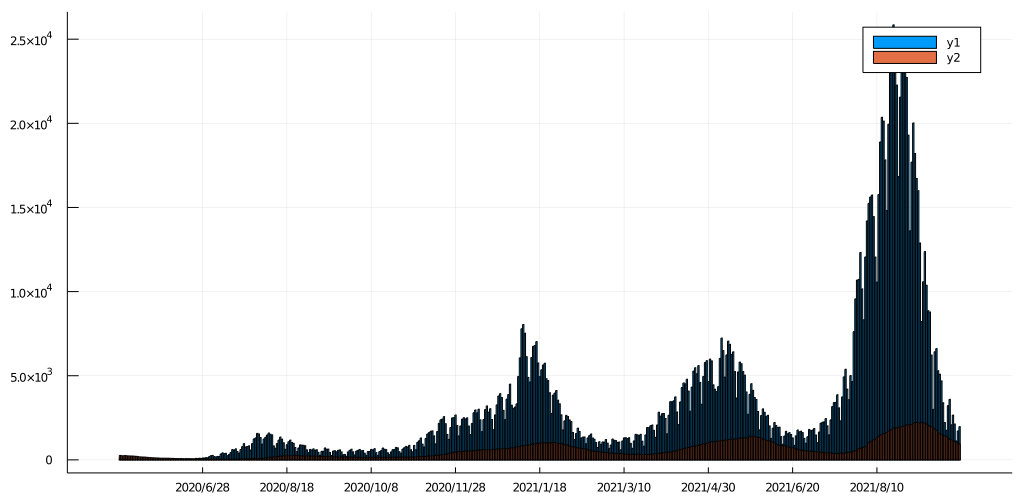

In [42]:
plot!(df[:, "日付"], df[:, "重症者数"], st=:bar, size=(1024, 500))

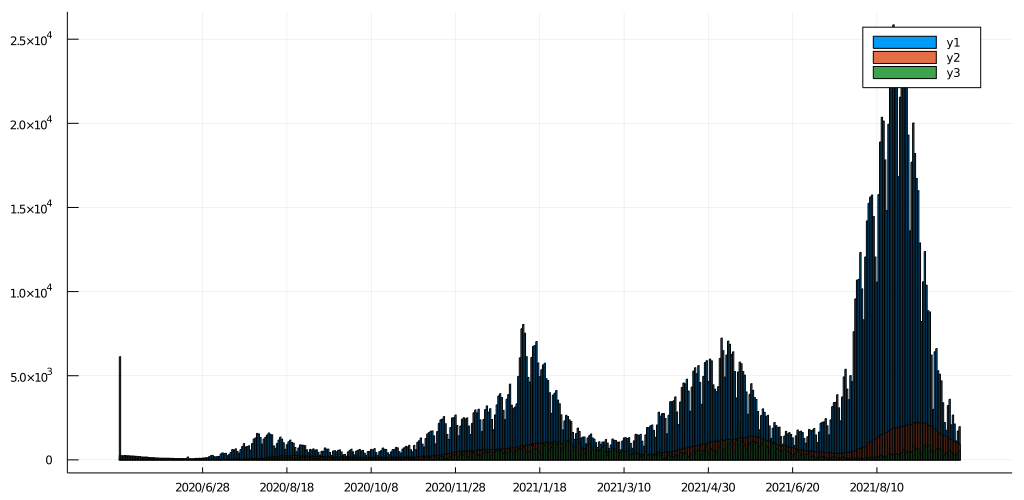

In [43]:
plot!(df[:, "日付"], df[:, "死亡者数(単日)(※10倍)"], st=:bar, size=(1024, 500))

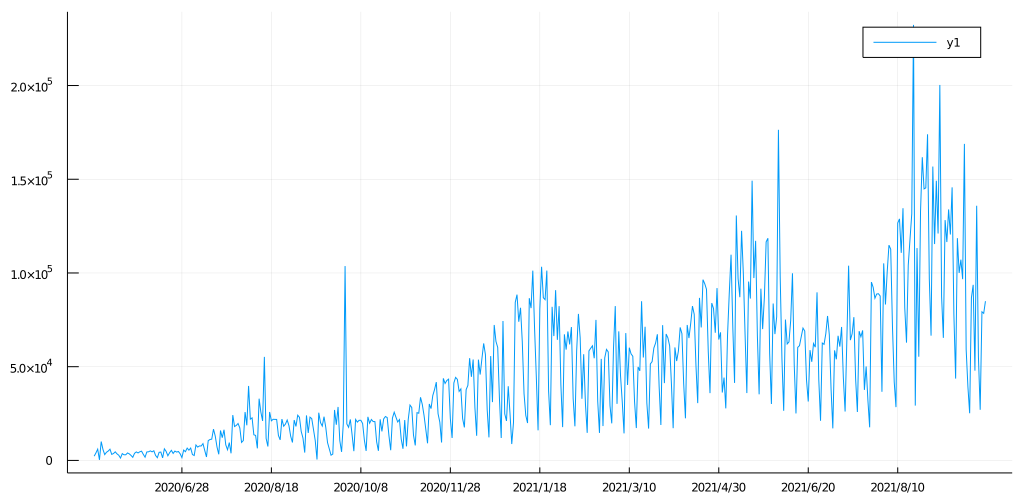

In [44]:
plot(df[:, "日付"], df[:, "PCR 検査実施件数(単日)"], size=(1024, 500))

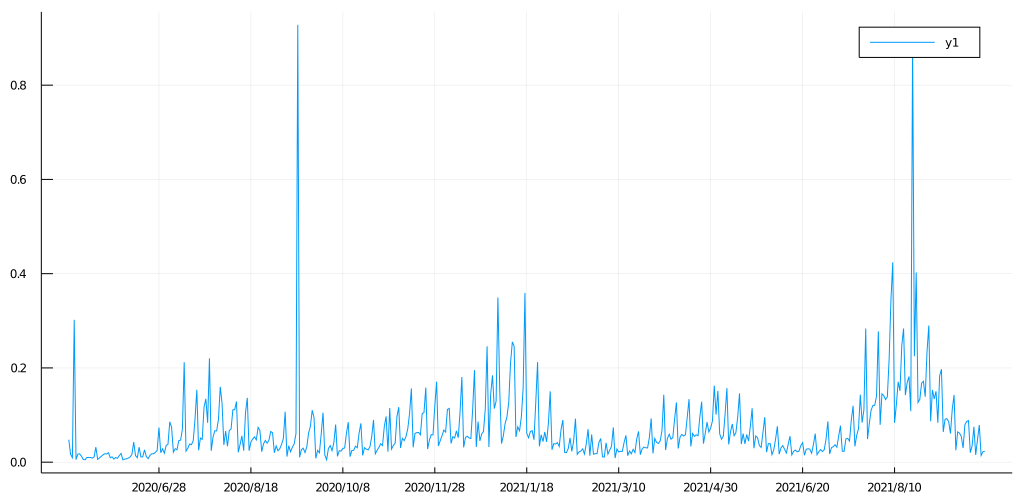

In [45]:
plot(df[:, "日付"], df[:, "陽性率"], size=(1024, 500))

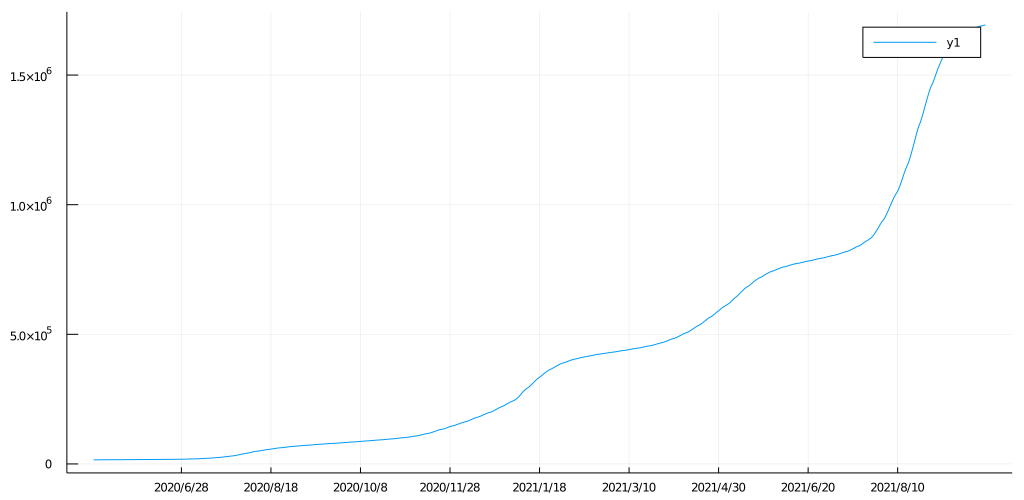

In [46]:
plot(df[:, "日付"], df[:, "累積感染者数"], size=(1024, 500))

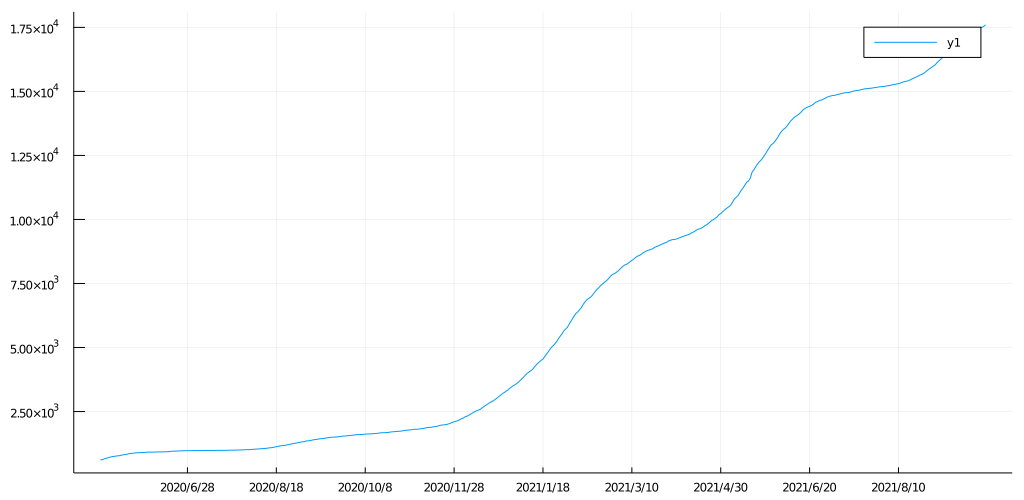

In [47]:
plot(df[:, "日付"], df[:, "死亡者数"], size=(1024, 500))

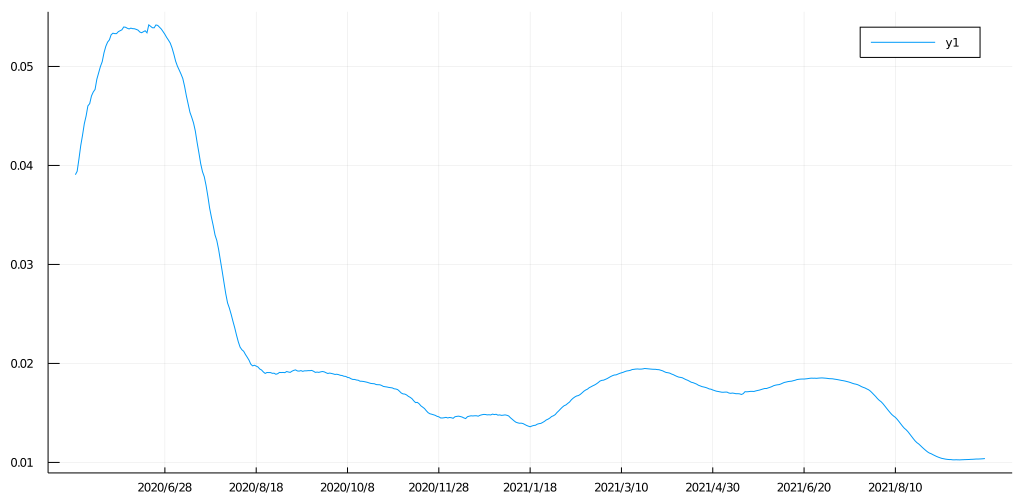

In [48]:
plot(df[:, "日付"], df[:, "致死率"], size=(1024, 500))